In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
## Setting certain variables for the program.
seed = 42
filterwarnings('ignore')
np.random.seed(seed)

In [3]:
master = pd.read_csv("train.csv")
master = master.drop(["Id"],axis=1)
print(master.shape)
master.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## Checking Missing Data
master.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [5]:
master.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## Data Cleaning

In [6]:
# Checking the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(master.isnull().sum()/len(master.index)*100,2).sort_values(ascending=False)[ round(master.isnull().sum()/len(master.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


<b>Obs</b>:</br>
5 features have large number missing values. Keeping a <b> arbitary threshold value of 80%</b>, the top four columns are removed.

In [7]:
cols_drop = ["PoolQC","MiscFeature","Alley","Fence"]
master = master.drop(cols_drop,axis=1)
master.shape

(1460, 76)

In [8]:
# Some columns have numerical values but have categorical meanings. Thus these needs to be ordered into categorical data type.
cols_cat = ["MSSubClass","OverallQual","OverallCond","YearBuilt"]

for col in cols_cat:
    master[col] = master[col].astype('category')

### Imputing the missing data with assumptions:

In [9]:
master['FireplaceQu'] = master['FireplaceQu'].fillna('No_Fireplace')
master['GarageYrBlt'] = master['GarageYrBlt'].fillna(0)
master['MasVnrType'] = master['MasVnrType'].fillna('None')
master['MasVnrArea'] = master['MasVnrArea'].fillna(0)
master['MasVnrArea'] = master['MasVnrArea'].fillna(0)
master['Electrical'] = master['Electrical'].fillna("Other")

## Exploratory Data Analysis:

Categorical Features vs Sales Price

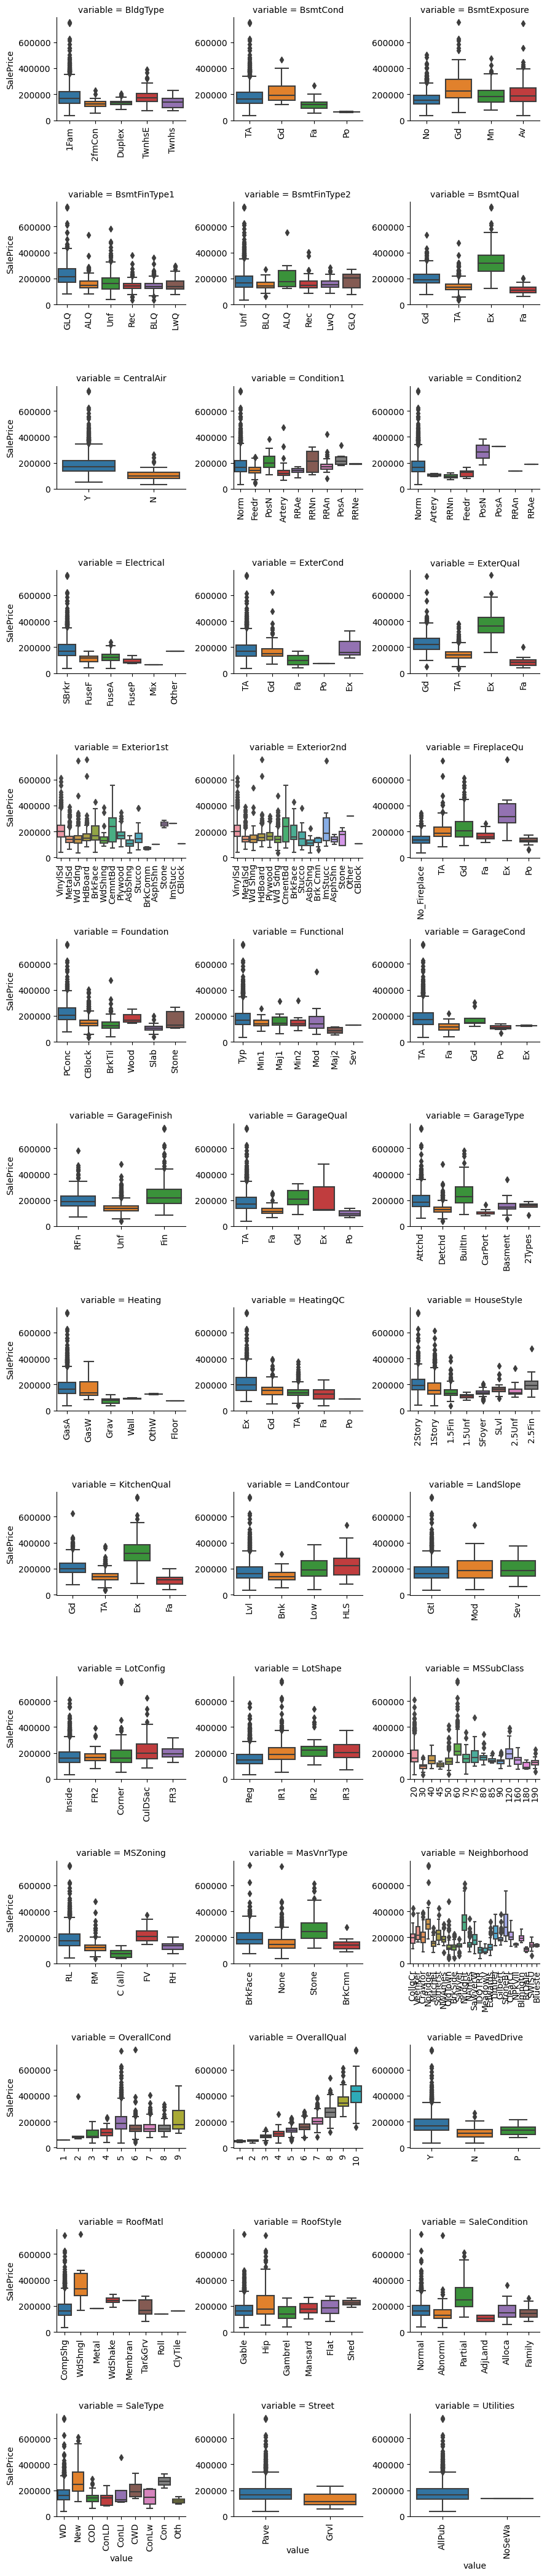

In [10]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = master.select_dtypes(exclude=['int64','float64'])
f = pd.melt(master, id_vars=['SalePrice'], value_vars=sorted(master[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

Some of the observations from above plot:
- Paved alleys properties has higher price.
- Houses where the basement quality is good and excellent are sold at higher prices.
- Houses with good and excellent garages are sold at higher prices.
- Houses with good quality kitchens has better prices.
- Houses with gas heating has good prices as well.

In [11]:
# Creating a dataframe of numerical features:
df_num = master.select_dtypes(include=['int64','float64'])

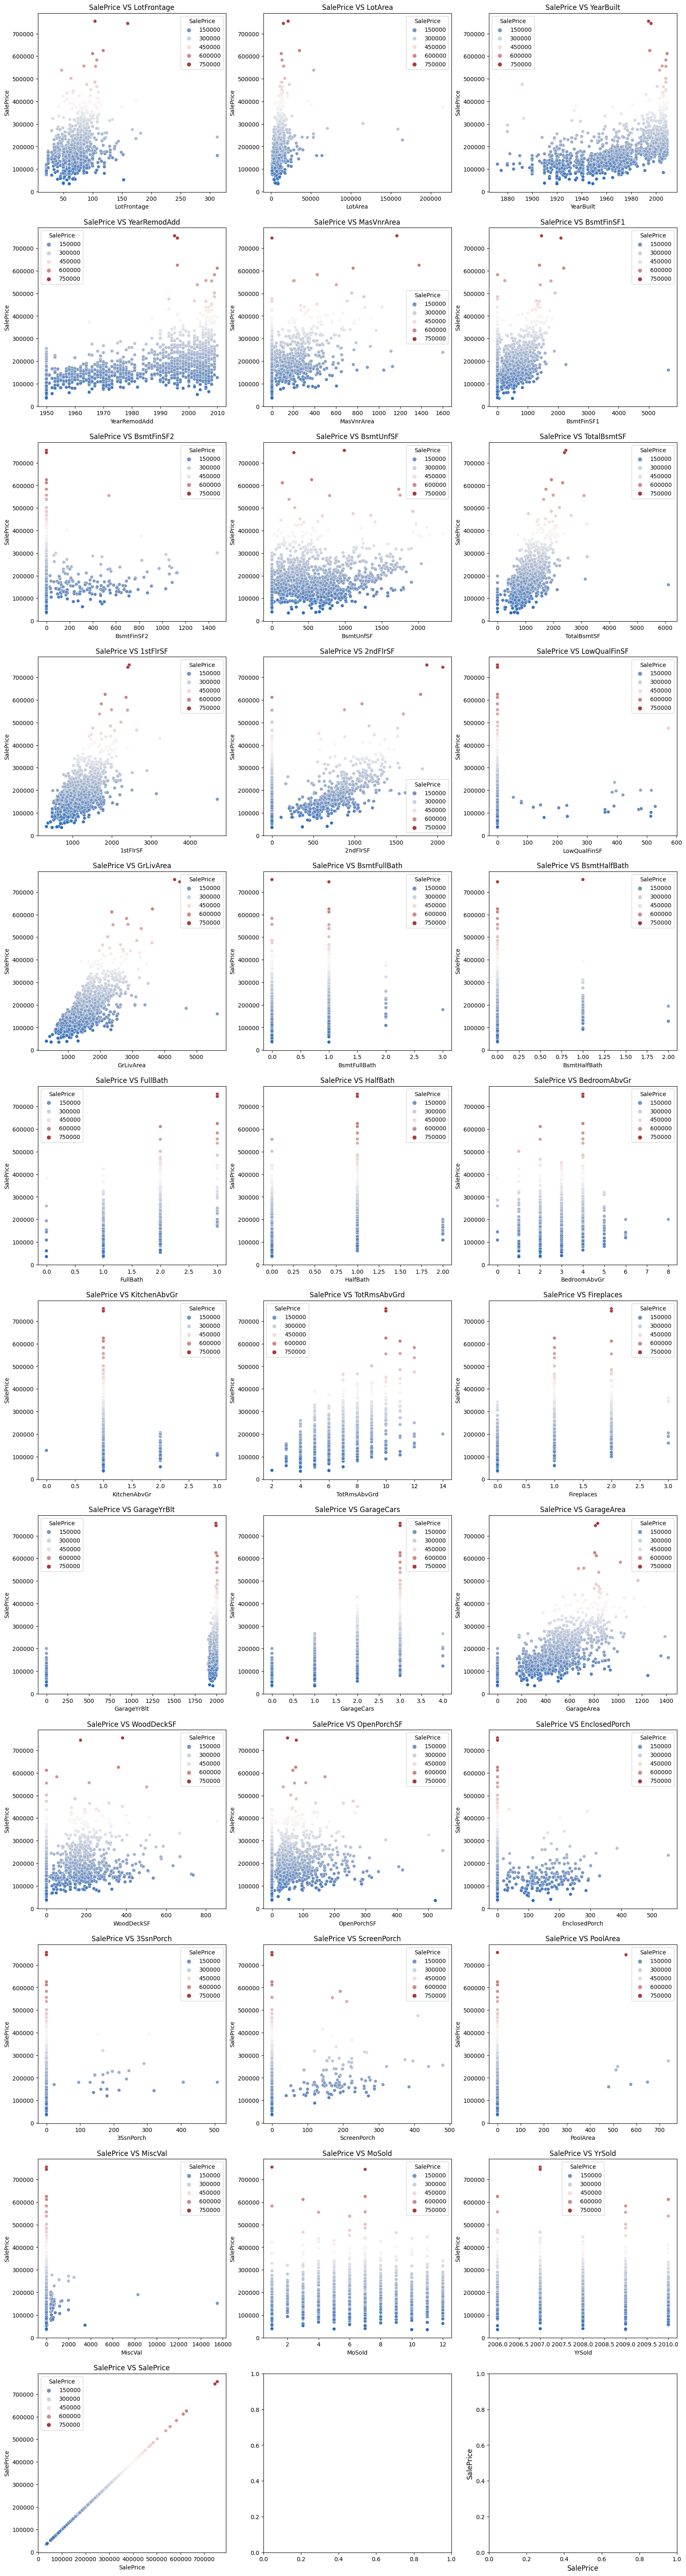

In [12]:
#Visualising numerical predictor variables with Target Variables
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='vlag')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

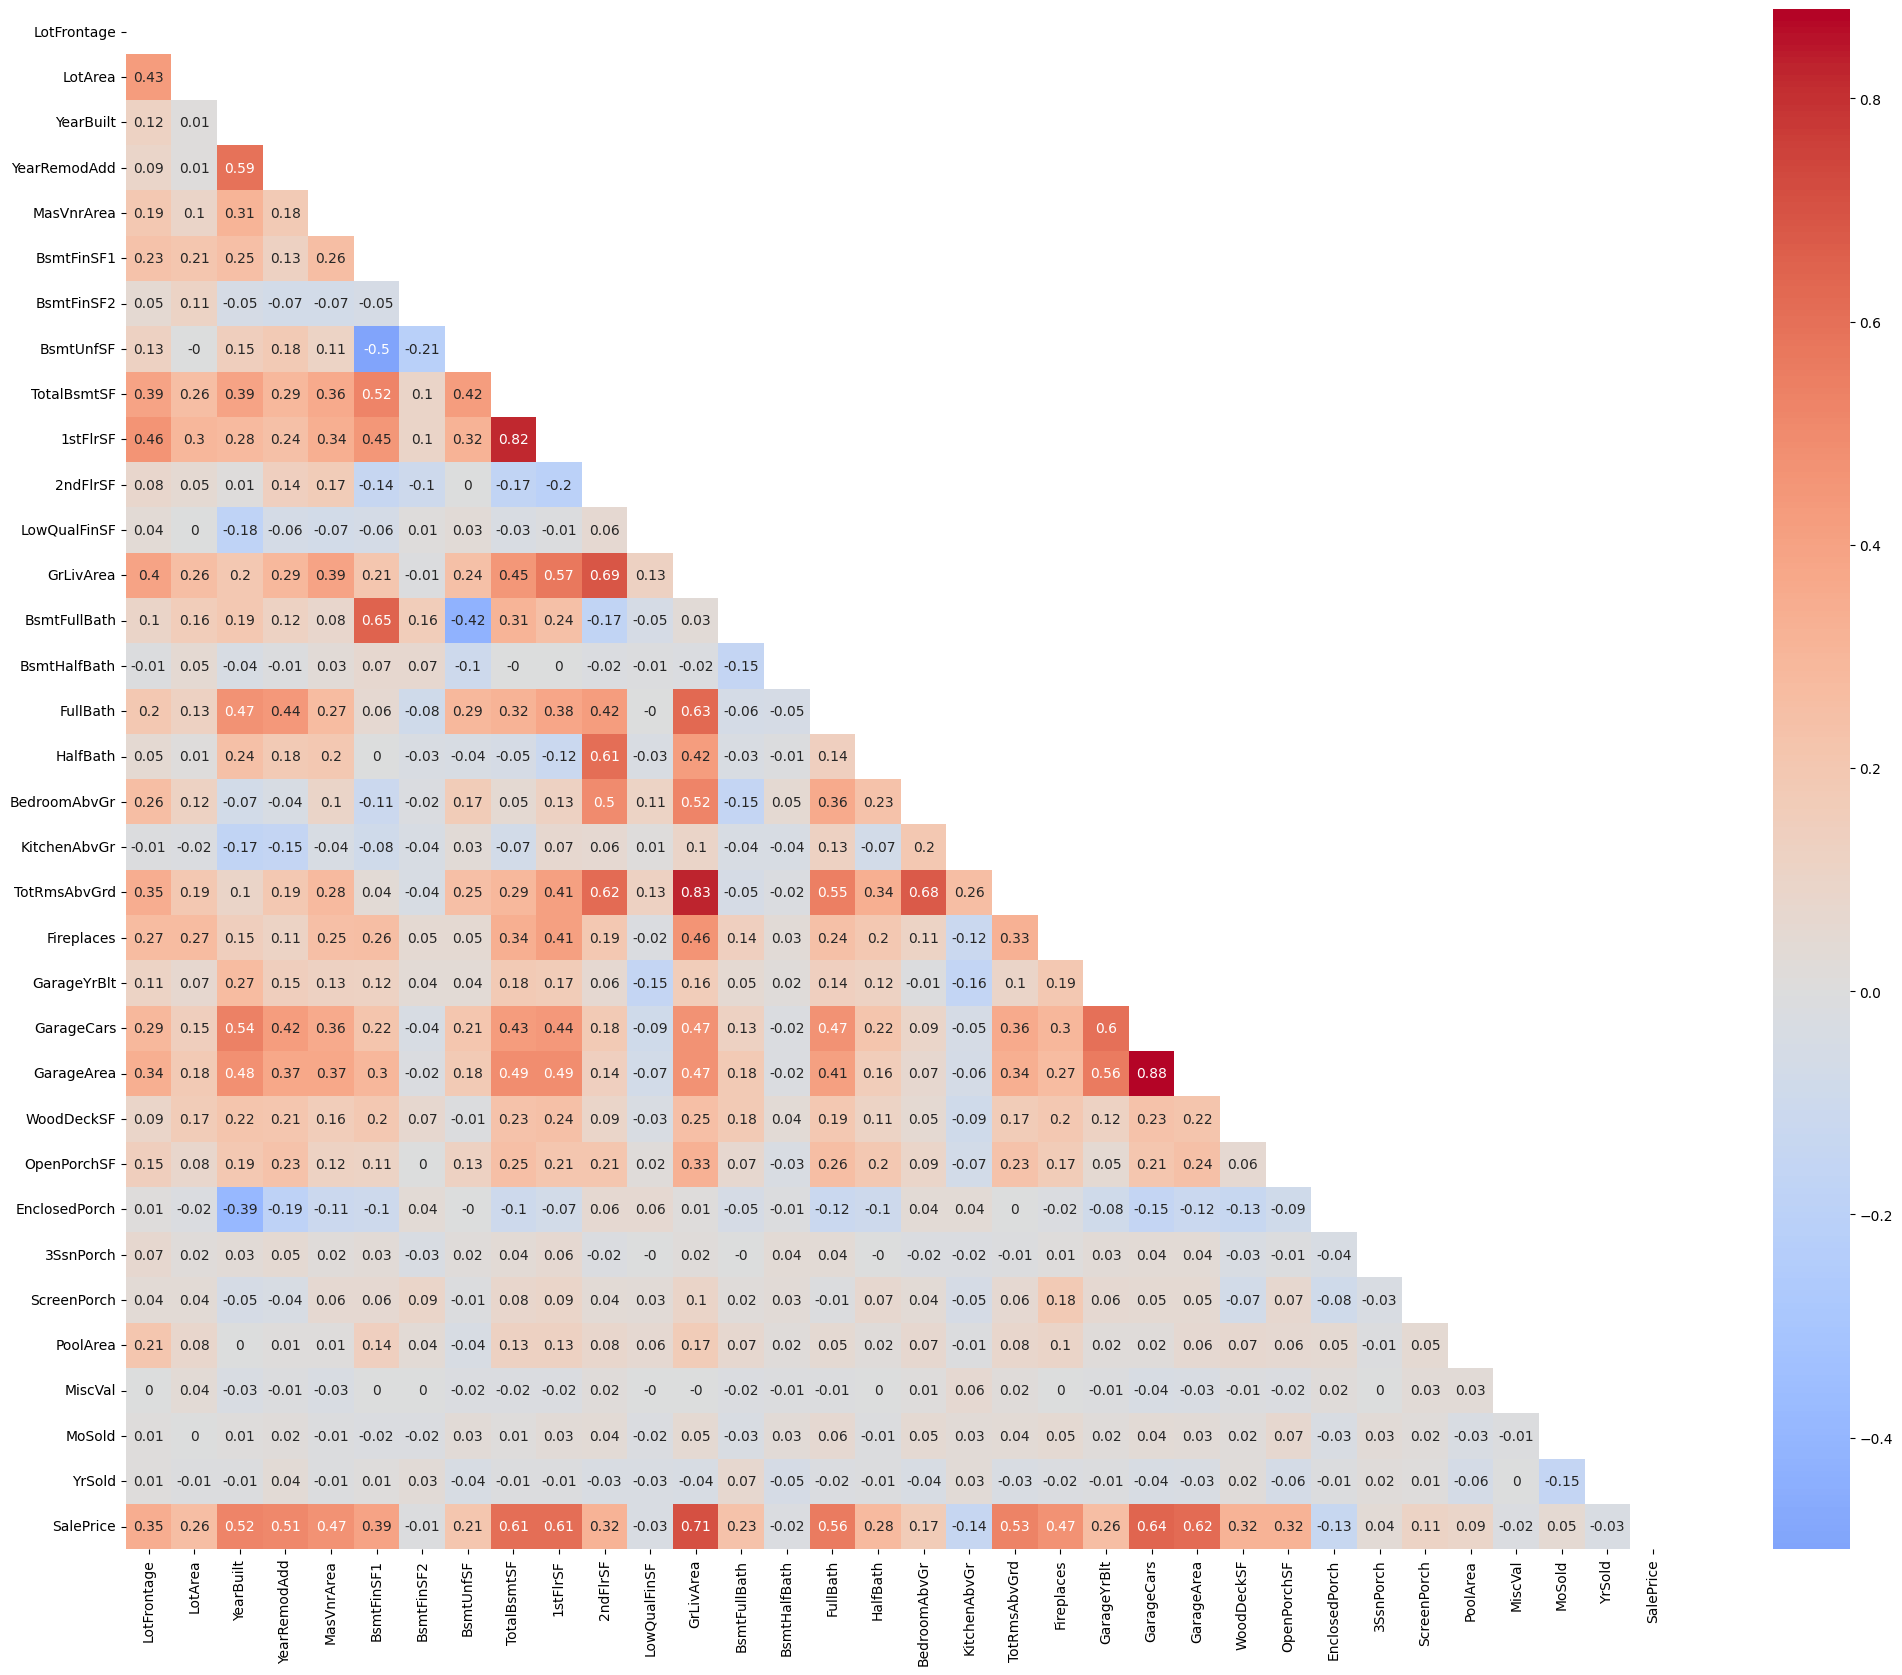

In [13]:
#Plotting heatmap of numerical features
plt.subplots(figsize = (25,20))
corr = df_num.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(round(corr,2), cmap='coolwarm' ,mask=mask, annot=True, center = 0)
plt.show()